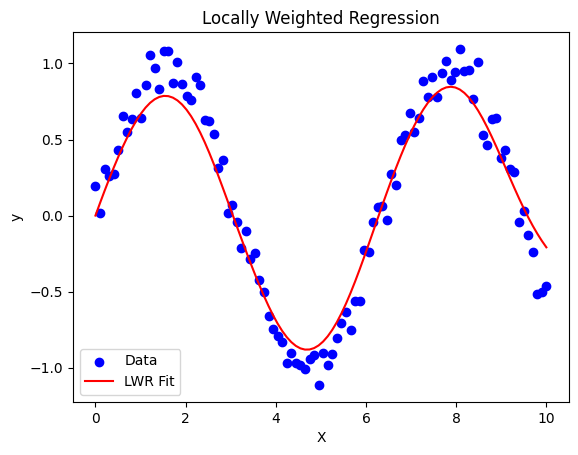

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Generate Sample Data
X = np.linspace(0, 10, 100)
y = np.sin(X) + np.random.normal(0, 0.1, 100)  # Sin wave with noise
X = X[:, np.newaxis]  # Reshape for matrix operations

# Define Locally Weighted Regression Function
def locally_weighted_regression(x0, X, y, tau):
    m = X.shape[0]
    W = np.exp(-np.square(X - x0) / (2 * tau**2))  # Gaussian Kernel
    W = np.diag(W.flatten())  # Convert to diagonal matrix
    theta = np.linalg.inv(X.T @ W @ X) @ (X.T @ W @ y)  # Solve for theta
    return x0 * theta  # Predicted value

# Apply LWR for multiple points
tau = 0.5  # Bandwidth parameter
X_pred = np.linspace(0, 10, 100)[:, np.newaxis]
y_pred = np.array([locally_weighted_regression(x, X, y, tau) for x in X_pred])

# Plot Results
plt.scatter(X, y, color="blue", label="Data")
plt.plot(X_pred, y_pred, color="red", label="LWR Fit")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.title("Locally Weighted Regression")
plt.show()

